<a href="https://colab.research.google.com/github/lephuocdat2000/-CS114.K21-/blob/master/Round3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
!wget https://cs.uit.edu.vn/data3.txt
!ls

--2020-06-14 07:26:42--  https://cs.uit.edu.vn/data3.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|118.69.123.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178891 (175K) [text/plain]
Saving to: ‘data3.txt.7’

data3.txt.7         100%[===================>] 174.70K   557KB/s    in 0.3s    

2020-06-14 07:26:43 (557 KB/s) - ‘data3.txt.7’ saved [178891/178891]

data3.txt    data3.txt.2  data3.txt.4  data3.txt.6  sample_data
data3.txt.1  data3.txt.3  data3.txt.5  data3.txt.7


In [0]:
data=pd.read_csv('data3.txt',header=None)
data.columns=['Complexity','Timing']
x=data[['Complexity']]
y=data[['Timing']]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,)

Slope:  [[9.27290489e-08]]
Intercept:  [-0.13820456]


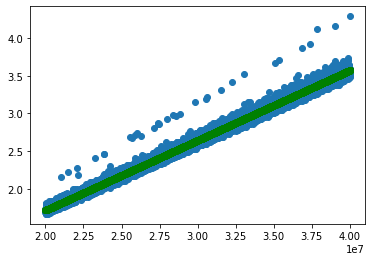

In [25]:
model=LinearRegression().fit(X_train,y_train)
print("Slope: ",model.coef_)
print("Intercept: ",model.intercept_)
y_fit=model.predict(X_train)
plt.scatter(X_train,y_train)
plt.plot(X_train,y_fit,'go')

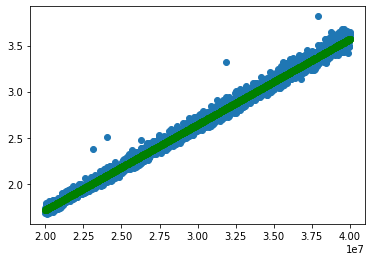

In [127]:
y_predict=model.predict(X_test)
plt.scatter(X_test,y_test)
plt.plot(X_test,y_predict,'go')

In [31]:
def Prediction(x,train=X_train,model=model):
  # squarex=np.power(x,2)
  #log2x=np.log2(x,where=(x!=0))*x
   arr=np.array([[x]])
   pred=model.predict(arr)
   print("Thoi gian du tinh cua thuat toan voi do phuc tap ",x," la: ",pred[0][0])
Prediction(39546552)

Thoi gian du tinh cua thuat toan voi do phuc tap  39546552  la:  3.5289095908557067


Đánh giá model

Hệ số R square:

In [20]:
r2_score(y_test,y_predict)

0.9897290008911028

Mean Square error

In [21]:
test_mse = mean_squared_error(y_test, y_predict,)
test_mse

0.0029732305247697826

Kết quả tệ hơn so với Round 2 ( R square thấp hơn (Round 2 là 0.99...)  và mean square error cao hơn nhiều (Round2 là 0.00014...)) 

Vấn đề ở đây là ở tập training set mới có khá nhiều data point nằm cách xa bộ dữ liệu tập trung gây sai lệch cho model trong việc tính toán slope và intercept sao cho cost function là thấp nhất 

Xây dựng model mới với việc thêm 2 features là nlog2n và nsquare

Slope:  [[ 6.34826082e-07  6.52316668e-16 -2.21298109e-08]]
Intercept:  [-0.50187066]


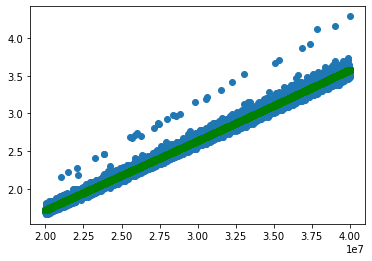

In [132]:
add_data=data.assign(Square=np.power(new_data['Complexity'],2),Logarit=(np.log2(new_data['Complexity'],where=(new_data['Complexity']!=0)))*new_data['Complexity'])
new_x=add_data[['Complexity','Square','Logarit']]
new_X_train,new_X_test,new_y_train,new_y_test=train_test_split(new_x,y,test_size=0.2,random_state=1,)
new_model=LinearRegression(normalize=True).fit(new_X_train,new_y_train)
print("Slope: ",new_model.coef_)
print("Intercept: ",new_model.intercept_)
new_y_fit=new_model.predict(new_X_train)
plt.scatter(new_X_train['Complexity'],new_y_train)
plt.plot(new_X_train['Complexity'],new_y_fit,'go')

In [114]:
new_X_test

,Complexity,Square,Logarit,ThirdFunc
286,36640808,1342548810892864,9.206717e+08,-5393234029635765760
674,21258818,451937342757124,5.174728e+08,-3099945325359072504
7533,39546552,1563929775088704,9.980383e+08,-3902704254389219840
6433,25624419,656610849087561,6.306430e+08,1840921742319678267
1141,36454559,1328934871884481,9.157238e+08,4584756708971255263
...,...,...,...,...
507,37659398,1418230257722404,9.477555e+08,6373637821433824472
3632,26088449,680607171225601,6.427387e+08,-8229067428939023359
8791,31552674,995571236550276,7.860168e+08,-1870486879623164024
612,23069803,532215810458809,5.642759e+08,-7417652320498131629


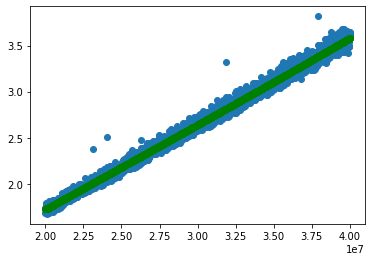

In [126]:
new_y_predict=new_model.predict(new_X_test)
plt.scatter(new_X_test['Complexity'],new_y_test)
plt.plot(new_X_test['Complexity'],new_y_predict,'go')

In [106]:
new_score= r2_score(new_y_test,new_y_predict)
new_score - r2_score(y_test,y_predict)

3.662728625508649e-06

In [107]:
new_test_mse = mean_squared_error(new_y_test,new_y_predict)
new_test_mse - test_mse

-1.060280157548412e-06

Với việc thêm 2 cột nlog2n và n^2 thì r square có cao hơn nhưng rất ít và mean square error còn thấp hơn ban đầu mặc dù chênh lệch cũng rất ít => mô hình này hiệu suất tương đương mô hình cũ 

In [0]:
def New_Prediction(x,train=new_X_train,model=new_model):
   squarex=np.power(x,2)
   xlog2x=(np.log2(x,where=(x!=0)))*x
   arr=np.array([[x,squarex,xlog2x]])
   pred=model.predict(arr)
   print("Thoi gian du tinh cua thuat toan voi do phuc tap ",x," la: ",pred[0][0])

In [110]:
New_Prediction(21258818   )
Prediction(21258818   )

Thoi gian du tinh cua thuat toan voi do phuc tap  21258818  la:  1.8375523591649041
Thoi gian du tinh cua thuat toan voi do phuc tap  21258818  la:  1.8331054110228693


In [81]:
new_X_test,new_y_test


(      Complexity            Square       Logarit
 286     36640808  1342548810892864  9.206717e+08
 674     21258818   451937342757124  5.174728e+08
 7533    39546552  1563929775088704  9.980383e+08
 6433    25624419   656610849087561  6.306430e+08
 1141    36454559  1328934871884481  9.157238e+08
 ...          ...               ...           ...
 507     37659398  1418230257722404  9.477555e+08
 3632    26088449   680607171225601  6.427387e+08
 8791    31552674   995571236550276  7.860168e+08
 612     23069803   532215810458809  5.642759e+08
 8427    30588875   935679273765625  7.606384e+08
 
 [2118 rows x 3 columns],        Timing
 286   3.32445
 674   1.82632
 7533  3.51381
 6433  2.24894
 1141  3.30729
 ...       ...
 507   3.32236
 3632  2.25782
 8791  2.87175
 612   1.98104
 8427  2.66272
 
 [2118 rows x 1 columns])